<a href="https://colab.research.google.com/github/ShlokArora2709/Mentorness_Internship/blob/main/Mentorness_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from scipy.stats import chi2_contingency

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Copy of FastagFraudDetection.csv')
data

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [3]:
data.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [5]:
data.nunique()

Transaction_ID           5000
Timestamp                4423
Vehicle_Type                7
FastagID                 4451
TollBoothID                 6
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     5000
Fraud_indicator             2
dtype: int64

In [6]:
columns_to_encode = ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location', 'Fraud_indicator']
label_encoders = {}

for column in columns_to_encode:

    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    label_encoders[column] = label_encoder
data

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,0,FTG-001-ABC-121,0,0,0,350,120,3,65,KA11AB1234,0
1,2,1/7/2023 14:55,1,FTG-002-XYZ-451,1,1,2,120,100,3,78,KA66CD5678,0
2,3,1/8/2023 18:25,2,NaN,3,1,2,0,0,3,53,KA88EF9012,1
3,4,1/9/2023 2:05,5,FTG-044-LMN-322,2,1,0,350,120,3,92,KA11GH3456,0
4,5,1/10/2023 6:35,6,FTG-505-DEF-652,1,0,1,140,100,3,60,KA44IJ6789,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,5,FTG-445-EDC-765,2,1,0,330,330,4,81,KA74ST0123,1
4996,4997,1/17/2023 13:43,6,FTG-446-LMK-432,1,0,1,125,125,4,64,KA38UV3456,1
4997,4998,2/5/2023 5:08,4,FTG-447-PLN-109,0,1,1,115,115,4,93,KA33WX6789,1
4998,4999,2/20/2023 20:34,3,FTG-458-VFR-876,1,0,0,145,145,4,57,KA35YZ0123,1


In [7]:
data.loc[data['Fraud_indicator'] == 0, 'Amount_paid'].sum()

91260

In [8]:
contingency_table = pd.crosstab(data['Fraud_indicator'], data['Vehicle_Type'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("P-value:", p_val)

P-value: 2.7910481004248044e-46


In [9]:
contingency_table = pd.crosstab(data['Fraud_indicator'], data['Lane_Type'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("P-value:", p_val)

P-value: 8.771224262158539e-07


In [10]:
contingency_table = pd.crosstab(data['Fraud_indicator'], data['Vehicle_Dimensions'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("P-value:", p_val)

P-value: 1.0767994203762803e-34


In [11]:
contingency_table = pd.crosstab(data['Fraud_indicator'], data['Geographical_Location'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("P-value:", p_val)

P-value: 5.39935030615341e-10


In [12]:
contingency_table = pd.crosstab(data['Fraud_indicator'], data['Vehicle_Speed'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("P-value:", p_val)

P-value: 0.3802937752541264


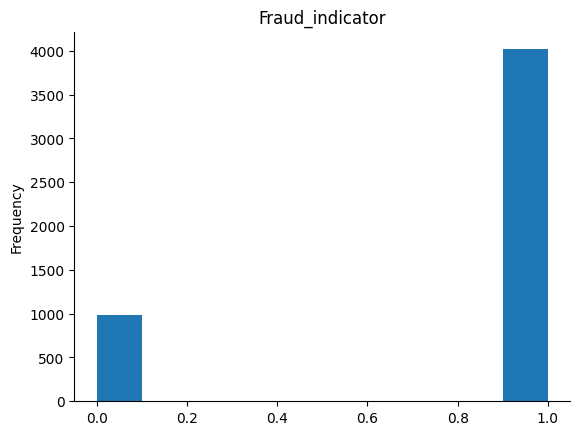

In [13]:
data['Fraud_indicator'].plot(kind='hist', title='Fraud_indicator')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index("Timestamp", inplace=True)
data

,Transaction_ID,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
Timestamp,,,,,,,,,,,,
2023-01-06 11:20:00,1,0,FTG-001-ABC-121,0,0,0,350,120,3,65,KA11AB1234,0
2023-01-07 14:55:00,2,1,FTG-002-XYZ-451,1,1,2,120,100,3,78,KA66CD5678,0
2023-01-08 18:25:00,3,2,NaN,3,1,2,0,0,3,53,KA88EF9012,1
2023-01-09 02:05:00,4,5,FTG-044-LMN-322,2,1,0,350,120,3,92,KA11GH3456,0
2023-01-10 06:35:00,5,6,FTG-505-DEF-652,1,0,1,140,100,3,60,KA44IJ6789,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 22:18:00,4996,5,FTG-445-EDC-765,2,1,0,330,330,4,81,KA74ST0123,1
2023-01-17 13:43:00,4997,6,FTG-446-LMK-432,1,0,1,125,125,4,64,KA38UV3456,1
2023-02-05 05:08:00,4998,4,FTG-447-PLN-109,0,1,1,115,115,4,93,KA33WX6789,1


In [15]:
data['month'] = data.index.month
data['weekofyear'] = data.index.isocalendar().week
data

,Transaction_ID,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,month,weekofyear
Timestamp,,,,,,,,,,,,,,
2023-01-06 11:20:00,1,0,FTG-001-ABC-121,0,0,0,350,120,3,65,KA11AB1234,0,1,1
2023-01-07 14:55:00,2,1,FTG-002-XYZ-451,1,1,2,120,100,3,78,KA66CD5678,0,1,1
2023-01-08 18:25:00,3,2,NaN,3,1,2,0,0,3,53,KA88EF9012,1,1,1
2023-01-09 02:05:00,4,5,FTG-044-LMN-322,2,1,0,350,120,3,92,KA11GH3456,0,1,2
2023-01-10 06:35:00,5,6,FTG-505-DEF-652,1,0,1,140,100,3,60,KA44IJ6789,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 22:18:00,4996,5,FTG-445-EDC-765,2,1,0,330,330,4,81,KA74ST0123,1,1,52
2023-01-17 13:43:00,4997,6,FTG-446-LMK-432,1,0,1,125,125,4,64,KA38UV3456,1,1,3
2023-02-05 05:08:00,4998,4,FTG-447-PLN-109,0,1,1,115,115,4,93,KA33WX6789,1,2,5


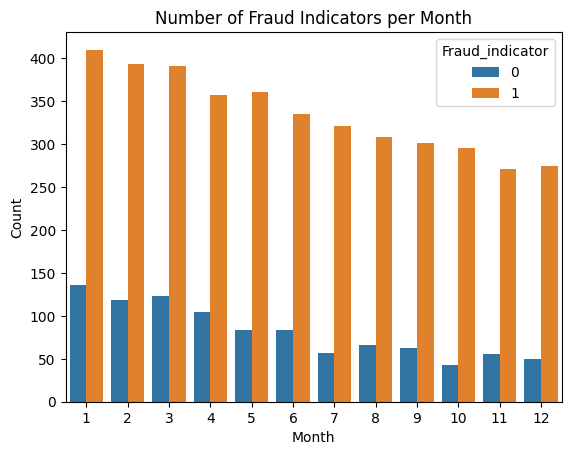

In [16]:
sns.countplot(data=data, x='month', hue='Fraud_indicator')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Fraud Indicators per Month')
plt.show()

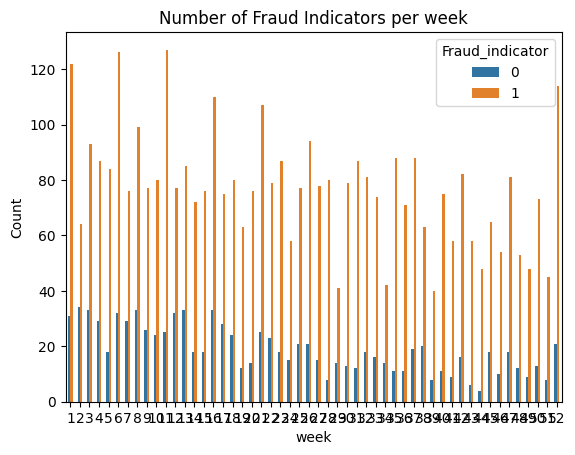

In [17]:
sns.countplot(data=data, x='weekofyear', hue='Fraud_indicator',width=0.5)
plt.xlabel('week')
plt.ylabel('Count')
plt.title('Number of Fraud Indicators per week')
plt.show()

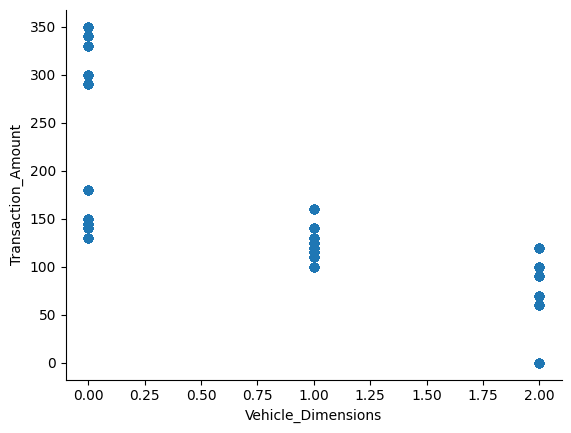

In [18]:
data.plot(kind='scatter', x='Vehicle_Dimensions', y='Transaction_Amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

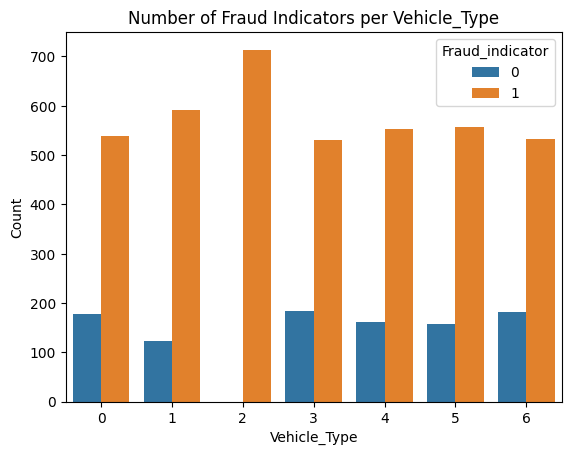

In [19]:
sns.countplot(data=data, x='Vehicle_Type', hue='Fraud_indicator')
plt.xlabel('Vehicle_Type')
plt.ylabel('Count')
plt.title('Number of Fraud Indicators per Vehicle_Type')
plt.show()

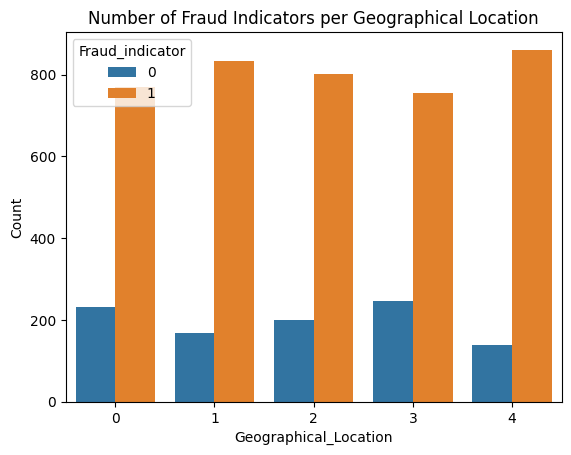

In [20]:
sns.countplot(data=data, x='Geographical_Location', hue='Fraud_indicator')
plt.xlabel('Geographical_Location')
plt.ylabel('Count')
plt.title('Number of Fraud Indicators per Geographical Location')
plt.show()


In [21]:
data.drop(columns=['Vehicle_Plate_Number','FastagID','Transaction_ID'],inplace=True)
data

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,month,weekofyear
Timestamp,,,,,,,,,,,
2023-01-06 11:20:00,0,0,0,0,350,120,3,65,0,1,1
2023-01-07 14:55:00,1,1,1,2,120,100,3,78,0,1,1
2023-01-08 18:25:00,2,3,1,2,0,0,3,53,1,1,1
2023-01-09 02:05:00,5,2,1,0,350,120,3,92,0,1,2
2023-01-10 06:35:00,6,1,0,1,140,100,3,60,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 22:18:00,5,2,1,0,330,330,4,81,1,1,52
2023-01-17 13:43:00,6,1,0,1,125,125,4,64,1,1,3
2023-02-05 05:08:00,4,0,1,1,115,115,4,93,1,2,5


In [22]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Fraud_indicator'],axis=1), data.Fraud_indicator, test_size=0.2, random_state=42)
X_train

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,month,weekofyear
Timestamp,,,,,,,,,,
2023-03-21 01:49:00,4,0,1,1,110,110,1,44,3,12
2023-02-08 20:05:00,3,1,0,0,145,145,4,61,2,6
2023-08-06 08:15:00,2,5,1,2,0,0,2,45,8,31
2023-09-14 10:33:00,2,5,1,2,0,0,0,96,9,37
2023-09-03 05:32:00,3,1,1,0,140,140,1,74,9,35
...,...,...,...,...,...,...,...,...,...,...
2023-06-25 00:13:00,1,0,0,2,70,70,1,67,6,25
2023-04-03 03:00:00,6,1,0,1,140,140,3,61,4,14
2023-11-23 03:53:00,6,1,0,1,110,110,2,52,11,47


In [23]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 150],
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [0.1, 0.5, 1, 5, 10, 30]
        }
    },
    'k_neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 10, 15],
            'weights': ['uniform', 'distance']
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'xgboost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [3, 6, 9],
            'learning_rate': [0.05, 0.1, 0.3]
        }
    },
    'lightgbm': {
        'model': lgb.LGBMClassifier(),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [3, 6, 12],
            'learning_rate': [0.05, 0.1, 0.3]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clfr =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clfr.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clfr.best_score_,
        'best_params': clfr.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [25]:
df

,model,best_score,best_params
0,random_forest,0.99000,"{'max_depth': None, 'min_samples_split': 5, 'n..."
1,logistic_regression,0.98750,{'C': 5}
2,k_neighbors,0.98900,"{'n_neighbors': 3, 'weights': 'distance'}"
3,naive_bayes,0.78050,{}
4,xgboost,0.99650,"{'learning_rate': 0.3, 'max_depth': 6, 'n_esti..."
5,lightgbm,0.99875,"{'learning_rate': 0.1, 'max_depth': 12, 'n_est..."


In [26]:
df[df['model']=='lightgbm']['best_params']

5    {'learning_rate': 0.1, 'max_depth': 12, 'n_est...
Name: best_params, dtype: object

In [ ]:
lgbm=lgb.LGBMClassifier(learning_rate= 0.1, max_depth= 12, n_estimators= 1500)
lgbm.fit(X_train,y_train)
y_pred=lgbm.predict(X_test)

In [28]:
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.9987212276214834
Recall: 0.9974457215836526
F1 Score: 0.9980830670926518
Accuracy: 0.997


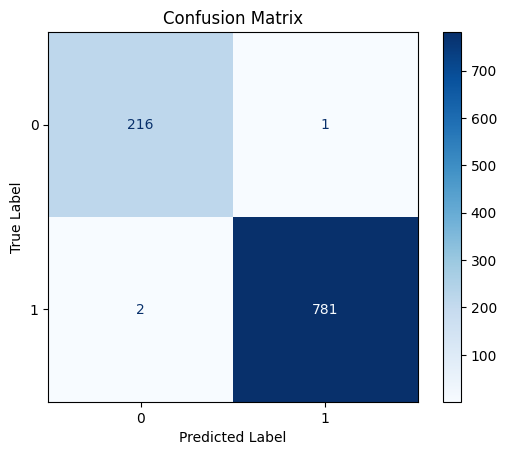

In [29]:
conf_matrix=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()